# Chapter 4: Numpy basic (Arrays and vectorized computation)
**Overview:**
* The NumPy ndarray: A Multidimensional Array Object
* Universal Functions: Fast Element-wise Array Functions
* Data Processing Using Arrays
* File Input and Output with Arrays
* Linear Algebra
* Random Number Generation
* Example: Random Walks


NumPy, short for Numerical Python, is the fundamental package required for high performance scientific computing and data analysis. It is the foundation on which nearly all of the higher-level tools in this book are built. Here are some of the things it provides: 
> * ndarray, a fast and space-efficient multidimensional array providing vectorizedarithmetic operations and sophisticated broadcasting capabilities
> * Standard  mathematical  functions  for  fast  operations  on  entire  arrays  of  datawithout having to write loops
> * Tools for reading / writing array data to disk and working with memory-mappedfiles
> * Linear algebra, random number generation, and Fourier transform capabilities
> * Tools for integrating code written in C, C++, and Fortran

For most data analysis applications, the main areas of functionality I’ll focus on are:
* Fast vectorized array operations for data munging and cleaning, subsetting andfiltering, transformation, and any other kinds of computations
* Common array algorithms like sorting, unique, and set operations
* Efficient descriptive statistics and aggregating/summarizing data
* Data alignment and relational data manipulations for merging and joining togetherheterogeneous data sets
* Expressing conditional logic as array expressions instead of loops with if-elif-else branches
* Group-wise data manipulations

# The numpy array: A multidimesional array object
> One of the key features of NumPy is its N-dimensional array object, or ndarray, which is a fast, flexible container for large data sets in Python. Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations between scalar elements:

Overview:
* Creating ndarrays
* Data type for ndarrays
* Operations between arrays and scalars
* Basic indexing and slicing 
* Boolean indexing
* Fancy indexing
* Transposing arrays and swapping axes

In [33]:
import numpy as np

In [34]:
data = np.random.randn(10)
data

array([ 0.86540763, -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 ,
       -0.24937038,  1.46210794, -2.06014071, -0.3224172 , -0.38405435])

We can multil a ndarray with a number:

In [35]:
data * 10

array([  8.65407629, -23.01538697,  17.44811764,  -7.61206901,
         3.19039096,  -2.49370375,  14.62107937, -20.60140709,
        -3.22417204,  -3.84054355])

Or they can add to the other same size ndarray

In [36]:
data + data

array([ 1.73081526, -4.60307739,  3.48962353, -1.5224138 ,  0.63807819,
       -0.49874075,  2.92421587, -4.12028142, -0.64483441, -0.76810871])

Each ndarray has a **shape**: the size of each dimension, and **dtype** describing data type of array:

In [37]:
data.shape

(10L,)

In [38]:
data.dtype

dtype('float64')

## Creating ndarrays
* Using **numpy.array** funtion.

In [39]:
data = [1, 2, 3, 4.5, -9]
type(data)

list

In [40]:
arr = np.array(data)
type(arr)

numpy.ndarray

In [41]:
arr2 = np.array([1, 2, 3, 5])
arr2.dtype

dtype('int32')

* create multidimesional array:

In [42]:
data = [[1,2,3,4], [5,6,7,8]]
arr = np.array(data)
arr

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [43]:
arr.shape

(2L, 4L)

In [44]:
arr.dtype

dtype('int32')

* create **zeros** or **ones** array

In [45]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [46]:
np.ones((3, 6))

array([[ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.]])

In [47]:
type((3,6))

tuple

* create **empty** array:

In [48]:
np.empty((2,3,2))

array([[[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]]])

* arange is an array-valued version of the built-in Python range function

In [49]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

** Some functions to create array with numpy **

| Function | Description |
|----------|-------------|
| array| Convert input data (list, tuple, array, or other sequence type) to an ndarray either byinferring a dtype or explicitly specifying a dtype. Copies the input data by default.| 
| asarray | Convert input to ndarray, but do not copy if the input is already an ndarray |
| arange | Like the built-in range but returns an ndarray instead of a list |
| ones, ones_like | Produce an array of all 1’s with the given shape and dtype. ones_like takes another array and produces a ones array of the same shape and dtype |
| zeros, zeros_like | Like ones and ones_like but producing arrays of 0’s instead |
| empty, empty_like | Create new arrays by allocating new memory, but do not populate with any values like ones and zeros |
| eye, identity | Create a square N x N identity matrix (1’s on the diagonal and 0’s elsewhere) |


In [50]:
arr = np.arange(6)
arr = arr.reshape((2, 3))    
np.ones_like(arr)

array([[1, 1, 1],
       [1, 1, 1]])

In [51]:
np.zeros_like(arr)

array([[0, 0, 0],
       [0, 0, 0]])

In [52]:
np.empty_like(arr)

array([[0, 0, 0],
       [0, 0, 0]])

In [53]:
np.eye(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [54]:
np.identity(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

## Data Types for ndarrays

> The data type or dtype is a special object containing the information the ndarray needs to interpret a chunk of memory as a particular type of data:

In [55]:
arr1 = np.array([1,2,3,4], dtype=np.int64)
arr1.dtype

dtype('int64')

In [56]:
arr2 = np.array([1,2,3,4], dtype=np.float64)
arr2

array([ 1.,  2.,  3.,  4.])

In [57]:
arr3 = np.array([1,2,3,4.8, 8589934592], dtype=np.int32)
arr3

OverflowError: Python int too large to convert to C long

| Type | Type Code | Description |
|------|-----------|-------------|
| int8, uint8 | i1, u1 | Signed and unsigned 8-bit (1 byte) integer types |
| int8, uint8 | i1, u1 | Signed and unsigned 8-bit (1 byte) integer types |
| int32, uint32 | i4, u4 | Signed and unsigned 32-bit integer types |
| int64, uint64 | i8, u8 | Signed and unsigned 32-bit integer types |
| float16 | f2 | Half-precision floating point |
| float32 | f4 or f | Standard single-precision floating point. Compatible with C float |
| float64, float128 | f8 or d | Standard double-precision floating point. Compatible with C doubleand Python float object |

> **convert** or **cast** one dtype to another using **astype** :

In [ ]:
arr = np.array([1,2,3,4,5], dtype=np.int64)
arr

In [ ]:
float_arr = arr.astype(np.float64)
float_arr

float to int, then the decimal part will be truncated

In [ ]:
arr = np.array([1.2, 1.4, -3.6])
arr.astype(np.int32)

string to number

In [ ]:
numeric_strings = np.array(['1.2', '3.4', '-5.6'])
numeric_strings

In [ ]:
numeric_strings.astype(np.float64)

## Operations between Arrays and Scalars
> Arrays are important because they enable you to express batch operations on dataw ithout writing any for loops. This is usually called vectorization

In [ ]:
arr = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.float64)
arr

In [ ]:
arr * arr

In [ ]:
arr - arr

Operations between scalar and array will propagate the value to each element.

In [ ]:
1 / arr

In [ ]:
arr ** 0.8

Operations between differently sized arrays is called **broadcasting**

## Broadcasting
### Broadcasting with scalar
The simplest example of broadcasting occurs when combining a scalar value with an array:

In [ ]:
arr = np.arange(5)
arr = arr * 4
arr

Then we say 4 has been broadcast to all of other element in multiplication operation

### Broadcasting with array
Another example: Demean each column of an array by subtracting the column means.

In [ ]:
arr = np.random.randn(4,3)
arr

In [ ]:
arr.mean(0)

In [ ]:
demeaned = arr - arr.mean(0)
demeaned

## Basic indexing and slicing
* One-dimensional arrays are simple

In [ ]:
arr = np.arange(10)
arr

In [ ]:
arr[5]

In [ ]:
arr[5:9]

if you assign a scalar value to a slice, as in arr[5:8] = 12, the value is
propagated (or *broadcasted henceforth*) to the entire selection

In [ ]:
arr[5:8] = 12

In [ ]:
arr

** => Array is not the same with list, that means, every modification you do on the array, then it will change the original source. Array is mutable**

Array: mutable

In [ ]:
arr

In [ ]:
arr_slice = arr[0:5]
arr_slice

In [ ]:
arr_slice[:4] = 1
arr

List: immutable

In [ ]:
lists = [1,2,3,4,5,6,7,8]
lists

In [ ]:
lists_slice = lists[:4]
lists_slice

In [ ]:
lists_slice[3] = 10000
lists_slice

In [ ]:
lists

Why ndarray is mutable? 

Because numpy has been designed with large dataset, so if Numpy insisted on copying data then the performance and the memory problems will be occured

> To use a copy of origin array, use **copy** method.

In [ ]:
arr = np.arange(10)
arr

In [ ]:
arr_copy = arr[:5].copy()
arr_copy

In [ ]:
arr_copy[2] = 10000
arr_copy

In [ ]:
arr

### Indexing with slices

one-demesional array:
    

In [ ]:
arr

In [ ]:
arr[4:]

two-demensional array:

In [ ]:
arr2d = np.random.randn(3,3)
arr2d[:2]

slice along axis 0, then slice along axis 1

In [ ]:
arr2d[:2, 1:]

## Boolean Indexing

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

In [ ]:
data = np.random.randn(7, 4)
data

If we wanted to select all the rows with corresponding name 'Bob'.  Like arithmetic operations, comparisons (such as ==) with arrays are also vectorized

In [ ]:
names == 'Bob'

This boolean array can be passed when indexing the array. 

The boolean array must be of the same length as the axis it’s indexing

In [ ]:
data[names == 'Bob']

In [ ]:
data[names != 'Bob']

In [ ]:
mask = (names == 'Bob') | (names == 'Will')
mask

In [ ]:
data[mask]

To set all of thenegative values in data to 0 we need only do:

In [ ]:
data[data < 0] = 0
data

## Fancy Indexing
> Fancy indexing is a term adopted by NumPy to describe indexing using integer arrays

In [ ]:
arr = np.empty((8,4))
for i in range(8):
    arr[i] = i
arr

To select a subset in order. Just pass a list or ndarray of integers 

In [ ]:
arr[[3, 4, 5, 1]]

To get desc. Add minus sign before integers

In [ ]:
arr[[-1, -7]]

> Passing multiple index arrays does something slightly different

In [ ]:
arr = np.arange(32).reshape(8,4)
arr

In [ ]:
arr[[1,5,7,2], [0,3,1,2]]

To select along axis 0, then select in order axis 1, we can do:

In [ ]:
arr[[1,5,7,2]][:,[0,3,1,2]]

**fancy indexing, unlike slicing, always copies the data into a new array**

## Transposing Arrays and Swapping Axes
> Arrays have the transpose method and alsothe special T attribute

In [ ]:
arr = np.arange(15).reshape(3,5)
arr

In [ ]:
arr.T

# Universal Functions: Fast Element-wise Array Functions
> Universal Functions or ufunc, is a function apply to element in ndarrays

Unary functions

In [ ]:
arr = np.arange(10)
np.sqrt(arr)

In [ ]:
np.exp(arr)

In [ ]:
np.exp?

Binary functions

In [ ]:
x = np.random.randn(8)
x

In [ ]:
y = np.random.randn(8)
y

In [ ]:
np.maximum(x, y)

# Data Processing Using Arrays
> Numpy arrays enables you to express many kind of processing data tasks without using while loops as pure python, and it faster than pure python from 2 or 3 times.

Example: We wants to evaluate function **sqrt(x^2 + y^2)**

In [ ]:
points = np.arange(-5, 5, 0.01)
points

In [ ]:
xs, ys = np.meshgrid(points, points)
ys

In [ ]:
xs

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [ ]:
z

In [ ]:
plt.imshow(z, cmap = plt.cm.gray)
plt.colorbar()

In [ ]:
plt.title('Image plot of $\sqrt{x^2 + y^2}$ for a grid of values')

In [ ]:
plt.show()

Overview:
* Expressing conditional logic as array operations
* Mathematical and statistical methods
* Method for boolean arrays
* Sorting 
* Unique and Oother set logic

## Expressing conditional logic as array operations

In [ ]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Suppose we want to get xarr if cond is True, otherwise get yarr if cond is False

In [ ]:
zip(xarr, yarr, cond)

In [ ]:
result = [x if c else y for x, y, c in zip(xarr, yarr, cond)]
result

* **np.where(conditional, value1, value2)**

In [ ]:
np.where(cond, xarr, yarr)

## Mathematical and Statistical Methods

> Static methods compute static about an entire array or data along an axis.

In [ ]:
arr = np.random.randn(5, 4)
arr

* **np.mean**

In [ ]:
arr.mean()

In [ ]:
np.mean(arr)

* **np.sum**

In [ ]:
arr.sum()

If we want to compute along an axis we should pass parameters.

Example: Compute mean along axis 1 (Rows)

In [ ]:
arr.mean(axis=1)

Other methods do not aggregate, instead producing an array of intermediate arrays: **cumsum** and **cumprod**

In [ ]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])
arr

* **np.cumsum**

In [ ]:
arr.cumsum()

In [ ]:
arr.cumsum(axis=0)

* **np.cumprod**

In [ ]:
np.cumprod(arr, axis =0)

* **np.var, np.std **

In [ ]:
np.var?

In [ ]:
np.var(np.array([1,2,3]))


In [ ]:
np.std(np.array([3,2,1]))

* **np.argmin, np.argmax**

In [ ]:
np.argmax(np.array([3,4,5,12,7]))

## Methods for boolean

* Couting on true value

In [ ]:
arr = np.random.randn(100)

In [ ]:
(arr > 0).sum()

* **np.any**:  tests whether one or more values in an array is True

In [ ]:
arr = np.array([True, False, False, True, True])

In [ ]:
np.any(arr)

* **np.all**: checks if every value is True

In [ ]:
np.all(arr)

## Sorting

* Sort 1D array

In [ ]:
arr = np.random.randn(20)

In [ ]:
arr.sort()
arr

* sort 2D array along an axis (using minus sign to descending sort)

In [ ]:
arr2d = np.random.randn(4,5)
arr2d

In [ ]:
np.sort(-arr2d, axis=0)

## Unique and Other Set Logic
> Numpy has some basic operations for one-dimensional ndarrays.
 
* **np.unique** is a commonly used one.

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

In [ ]:
ints = np.array([1, 2, 3, 1, 2, 5, 6, 9, 1, 2, 9])
np.unique(ints)

pure python has a same functions with **np.unique** is **sorted**

In [ ]:
sorted(set(names))

* **intersect1d(x, y)**: Compute the sorted, common elements in x and y

In [ ]:
np.intersect1d?

In [ ]:
np.intersect1d([1, 2, 3, 4], [1, 3, 2, 8])

* **union1d(x, y)**: Compute the sorted union of elements

In [ ]:
np.union1d?

In [ ]:
np.union1d([-2, 1, 0, 5], [3, 4, 5])

* **in1d(x, y)**: Compute a boolean array indicating whether each element of x is contained in y

In [ ]:
np.in1d?

In [ ]:
%timeit(np.in1d([1, 1, 2, 3, -2, -1], [2, 3], assume_unique=False))

In [ ]:
%timeit(np.in1d([1, 1, 2, 3, -2, -1], [2, 3], assume_unique=True))

* **setdiff1d(x, y)**: Find the set difference of two arrays.

In [ ]:
np.setdiff1d?

In [ ]:
np.setdiff1d([1,2,3,4,5,6,1,2], [3,4,5,6])

# File input and output with array
> Numpy can save and load data from disk (text or binary is okay)

## Storing Arrays on Disk in Binary Format

**np.save** and **np.load** are the two workhorse functions for efficiently saving and loading array data on disk. Arrays are saved by default in an uncompressed raw binary format with file extension **.npy**.

In [ ]:
arr = np.arange(10)
np.save('some_array', arr)

In [ ]:
!ls

In [ ]:
np.load('some_array.npy')

* using **np.savez** to zip file

In [ ]:
np.savez('array_archive.npz', a=arr, b=arr)

In [ ]:
arch = np.load('array_archive.npz')
arch.files

In [ ]:
arch['a']

## Saving and Loading Text Files

* **np.loadtxt**

In [ ]:
arr2d = np.loadtxt('array_ex2.gz', delimiter=',')
arr2d

* **np.savetxt**

In [ ]:
np.savetxt('array_ex2.gz', arr2d, delimiter=',')

# Linear Algebra
> Linear algebra, like matrix multiplication, decompositions, determinants, and othersquare matrix math

* **np.dot**: multiply matries

In [ ]:
x = np.array([[1,2,3], [4,5,6]])
x

In [ ]:
y = np.array([[2,3], [4,5], [6,7]])
y

In [ ]:
x.dot(y)

* **numpy.linalg**: has a standard set of matrix decompositions and things like inverse and determinant

In [ ]:
from numpy.linalg import inv, qr

In [ ]:
X = np.random.randn(5,5)
X

In [ ]:
mat = X.T.dot(X)
mat

In [ ]:
inv(mat)

In [ ]:
mat.dot(inv(mat))

In [ ]:
q, r = qr(mat)

In [ ]:
r

# Random Number Generation

> The **numpy.random** module supplements the built-in Python random with functions for
efficiently generating whole arrays of sample values from many kinds of probability. 


For example, you can get a 4 by 4 array of samples from the standard
normal distribution using **normal** :

In [58]:
samples = np.random.normal(size=(4,4))
samples

array([[ 1.13376944, -1.09989127, -0.17242821, -0.87785842],
       [ 0.04221375,  0.58281521, -1.10061918,  1.14472371],
       [ 0.90159072,  0.50249434,  0.90085595, -0.68372786],
       [-0.12289023, -0.93576943, -0.26788808,  0.53035547]])

**numpy.random**:

In [59]:
from random import normalvariate

In [60]:
N = 1000000

In [61]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

1 loop, best of 3: 667 ms per loop


In [62]:
%timeit np.random.normal(size=N)

10 loops, best of 3: 28 ms per loop


There are  some function available in **numpy.random**

| Function | Description |
|----------|-------------| 
| seed | Seed the random number generator |
| permutation | Return a random permutation of a sequence, or return a permuted range |
| shuffle | Randomly permute a sequence in place |
| rand | Draw samples from a uniform distribution |
| randint | Draw random integers from a given low-to-high range |
| randn | Draw samples from a normal distribution with mean 0 and standard deviation 1 (MATLAB-like interface) |
| binomial | Draw samples a binomial distribution |
| normal | Draw samples from a normal (Gaussian) distribution |
| beta | Draw samples from a beta distribution |
| chisquare | Draw samples from a chi-square distribution |
| gamma | Draw samples from a gamma distribution |
| uniform | Draw samples from a uniform [0, 1) distribution |


**np.random.seed**: Makes the random numbers predictable if we set **seed != None**

In [63]:
np.random.seed(seed=None)
np.random.rand(4)

array([ 0.31622867,  0.97554429,  0.24503677,  0.0298313 ])

In [64]:
np.random.seed(seed=1)
np.random.randn(4)

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862])

**np.random.permutation**: Randomly permute a sequence, or return a permuted range.

In [65]:
np.random.permutation(10)

array([1, 7, 3, 0, 8, 5, 9, 4, 2, 6])

In [66]:
np.random.permutation([4, 3, 5, 6, 0, 1, 8, 7, 2, 9])

array([2, 6, 1, 9, 4, 8, 3, 7, 0, 5])

**np.random.shuffer**: Randomly permute a sequence in place

In [67]:
arr = np.arange(9).reshape(3,3)
np.random.shuffle(arr)
arr

array([[0, 1, 2],
       [6, 7, 8],
       [3, 4, 5]])

**np.random.binomial**

In [68]:
np.random.binomial(30000, 0.2, size=6)

array([5959, 6011, 5903, 5957, 5831, 6090])

# Example: Random Walk

An illustrative application of utilizing array operations is in the simulation of randomwalks. Let’s first consider a simple random walk starting at 0 with steps of 1 and -1occurring with equal probability. A pure Python way to implement a single randomwalk with 1,000 steps using the built-in **random** module:

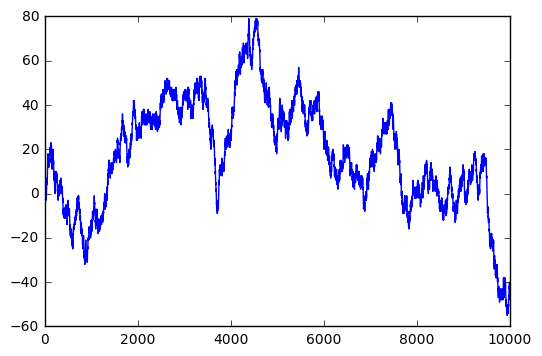

In [69]:
import random
position = 0
walk = [position]
steps = 10000
for i in xrange(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
walk
import matplotlib.pyplot as plt
plt.plot(walk)
plt.show()

By using **cumsum** instead of for loop

In [70]:
nsteps = 10000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
walk

array([-1, -2, -3, ..., -8, -9, -8])

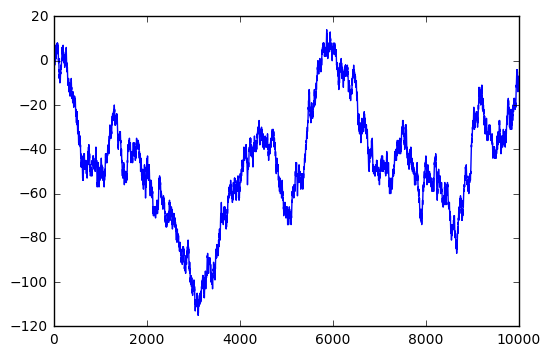

In [71]:
plt.plot(walk)
plt.show()

In [72]:
walk.min()

-115

In [73]:
walk.max()

14

We can extract some statics here. We want to know the index of Maximum Value which has abs reaches to a particular value. First we can use **np.abs(walk) >= 10**, it gives us boolean arrray if value reached or exceeded 10. And then we use **argmax()** to return first index of maximumvalue.

In [74]:
(np.abs(walk) >= 10).argmax()

131

## Simulating Many Random Walks at Once

In [75]:
nwalks = 5000

In [76]:
nsteps = 1000

In [77]:
draws = np.random.randint(0, 2, size=(nwalks, nsteps))

In [78]:
draws

array([[0, 1, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 0, 1, ..., 0, 1, 0],
       ..., 
       [1, 0, 1, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 1, 0]])

In [79]:
steps = np.where(draws > 0, 1, -1)
steps

array([[-1,  1,  1, ...,  1, -1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       [ 1, -1,  1, ..., -1,  1, -1],
       ..., 
       [ 1, -1,  1, ..., -1,  1,  1],
       [ 1, -1, -1, ...,  1, -1,  1],
       [-1,  1,  1, ..., -1,  1, -1]])

In [80]:
walks = steps.cumsum(axis=1)
walks

array([[ -1,   0,   1, ...,  58,  57,  56],
       [ -1,   0,   1, ...,   8,   9,   8],
       [  1,   0,   1, ..., -20, -19, -20],
       ..., 
       [  1,   0,   1, ...,  44,  45,  46],
       [  1,   0,  -1, ...,  14,  13,  14],
       [ -1,   0,   1, ...,   0,   1,   0]])

In [81]:
walks.max()

129

In [82]:
walks.min()

-111

We can compute how many rows has value reach to 30.

In [83]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True,  True, False, ...,  True, False, False], dtype=bool)

In [84]:
hits30.sum()

3352

We can use this boolean array to select out the rows of walks that actually cross theabsolute 30 level and call argmax across axis 1 to get the crossing times:

In [85]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

In [86]:
crossing_times

array([207, 585, 293, ..., 441, 355, 431], dtype=int64)

In [87]:
np.abs(walks[hits30])

array([[ 1,  0,  1, ..., 58, 57, 56],
       [ 1,  0,  1, ...,  8,  9,  8],
       [ 1,  0,  1, ..., 68, 67, 66],
       ..., 
       [ 1,  0,  1, ..., 62, 61, 60],
       [ 1,  2,  1, ..., 10,  9, 10],
       [ 1,  0,  1, ..., 44, 45, 46]])

In [88]:
crossing_times.mean()

496.84427207637231